<a href="https://colab.research.google.com/github/sidyr6002/ML_Models_From_Scratch/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000, tol=1e-6):
        '''
            learning_rate: float, learning rate for gradient descent
            max_iterations: int, maximum number of iterations for gradient descent
            tol: float, tolerance for stopping criteria
        '''
        if learning_rate <= 0:
            raise ValueError("Learning rate must be a positive value.")
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tol = tol

        self.weights = None
        self.bias = None

        self.costs = []

    def _sigmoid(self, z):
        '''
            Compute sigmoid function to map values between 0 and 1.
        '''
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def _initialize_parameters(self, X):
        '''
            Initialize weights and bias with zeros.
        '''
        n_features = X.shape[1]
        self.weights = np.zeros((n_features, 1))
        self.bias = 0.0

    def _compute_cost(self, y, y_pred):
        '''
            Compute cost (log loss) for weights and bias.
        '''
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def _compute_gradients(self, X, y, y_pred):
        '''
            Compute gradients for weights and bias.
        '''
        m = X.shape[0]

        dw = (1 / m) * np.dot(X.T, (y_pred - y)) # (n, m) @ (m, 1) => (n, 1)
        db = (1 / m) * np.sum(y_pred - y)

        return dw, db

    def fit(self, X, y, verbose=False, plot_costs=False):
        '''
           Train the logistic regression model using gradient descent.

            Parameters:
            - X: (m, n) array of training features
            - y: (m, 1) or (m,) array of labels {0, 1}
            - verbose: bool, print progress
            - plot_cost: bool, plot cost curve after training
        '''
        if y.ndim == 1:
            y = y.reshape(-1, 1)

        self._initialize_parameters(X)
        self.costs = []

        prev_cost = 0
        for i in range(self.max_iterations):
            y_pred = self._sigmoid(np.dot(X, self.weights) + self.bias)

            cost = self._compute_cost(y, y_pred)
            self.costs.append(cost)

            dw, db = self._compute_gradients(X, y, y_pred)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i > 0 and abs(cost - prev_cost) < self.tol:
                if verbose:
                    print(f"Early stopping at iteration {i + 1}.")
                break

            prev_cost = cost

            if verbose and (i % 100) == 0:
                print(f"Iteration {i}, Cost: {cost}")

        if plot_costs:
            plt.figure(figsize=(8, 5))
            plt.plot(self.costs)
            plt.title("Training Cost Over Iterations")
            plt.xlabel("Iteration")
            plt.ylabel("Cost (Log Loss)")
            plt.grid(True)
            plt.show()

    def predict_proba(self, X):
        '''
            Predict class probabilities for input features.
        '''
        return self._sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X, threshold=0.5):
        '''
            Predict class labels for input features.
        '''
        y_pred_proba = self.predict_proba(X)
        y_pred = (y_pred_proba >= threshold).astype(int)
        return y_pred

    def score(self, X, y):
        '''
            Compute accuracy of the model on input features and labels.
        '''
        if y.ndim == 1:
            y = y.reshape(-1, 1)

        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

##Let's see the model working

In [ ]:
np.random.seed(42)
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(
        n_samples=500,
        n_features=3,
        n_redundant=0,
        n_informative=2,
        n_clusters_per_class=1,
        n_classes=2,
        random_state=42
    )

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (500, 3)
y shape: (500,)


In [ ]:
print(f"Classes in y: {np.unique(y)}")

Classes in y: [0 1]


Normalizing the features so that it will help us converge

In [ ]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

Test and Train Split

In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

Iteration 0, Cost: 0.6931471805599452
Iteration 100, Cost: 0.36690163245123814
Iteration 200, Cost: 0.33320260995861417
Iteration 300, Cost: 0.32244432444235005
Iteration 400, Cost: 0.31777061540116464
Iteration 500, Cost: 0.3154137630232673
Iteration 600, Cost: 0.3141147618495429
Iteration 700, Cost: 0.31335530459637817
Iteration 800, Cost: 0.3128923828946122
Iteration 900, Cost: 0.31260141551392406


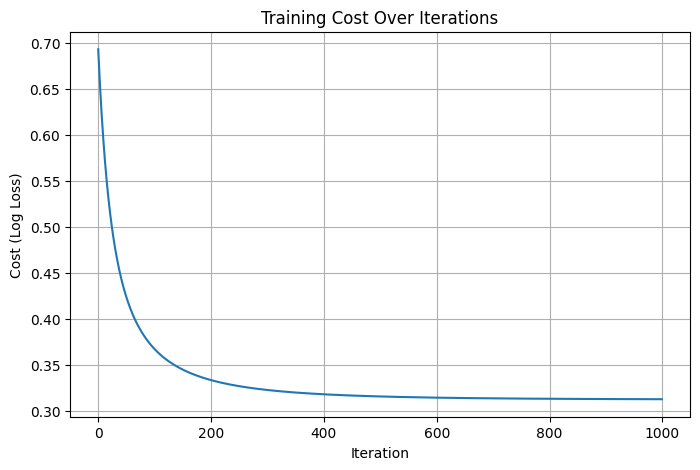

In [ ]:
model = LogisticRegression(learning_rate=0.1, max_iterations=1000)
model.fit(X_train, y_train, verbose=True, plot_costs=True)

In [ ]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f"\nTrain Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.8675
Test Accuracy: 0.8900


Lets also calculate the precision and recall

In [ ]:
def calculate_precision_recall(y_true, y_pred):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            true_positives += 1
        elif yt == 0 and yp == 1:
            false_positives += 1
        elif yt == 1 and yp == 0:
            false_negatives += 1

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    return precision, recall

In [ ]:
y_test_pred = model.predict(X_test)
precision, recall = calculate_precision_recall(y_test, y_test_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.8600
Recall: 0.9149
